# 10/22/2015

# Beginning Analysis of Red Disk Fraction over Redshift, starting by using Tom's selection Method


# Section 1: Cross-matching with ULTRAVISTA catalog
## ULTRAVISTA provides k-corrected colors and magnitudes for 339,384 galaxies in the COSMOS field. GZ:Hubble classified 84,350 galaxies in the COSMOS field. Of these, 70,198 were sky-matched in the ULTRAVista catalog (with a max. separation of 1"). 

## link to ULTRAVista data: http://terapix.iap.fr/article.php?id_article=844

## A note: in Tom's work, he claims that 26,452 of these are within a redshift range 0.2 <= z <= 1.0, however I find 51,370 in this range (see below). I'm not sure which z measurement he's going with though - I'm using the 'Z' parameter as described in Griffith's et al. (spec z unless bad, then photoz). 

In [5]:
%pylab inline
import matplotlib.gridspec as gridspec

from astropy.io import fits as pyfits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex']=True


Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pyfits.open('/home/mel/Documents/GZ_HUBBLE/other_catalogs/ULTRAVISTA/matched_catalog.fits')
data=data[1].data

In [58]:
data_2_1 = (data['Z']>=0.2) & (data['Z']<=1.0) & (data['t01_smooth_or_features_a02_features_or_disk_weighted_fraction']>=.8)
print 'The number of galaxies in COSMOS between $0.2 < z < 1.0$ is %s'%len(data[data_2_1])

The number of galaxies in COSMOS between $0.2 < z < 1.0$ is 2501


# Section 2: Removing Dusty Galaxies
# Galaxies so far (UV + GZH + 0.2 < z < 1.0): 51,370
## a note: the NUV-MR column in the UV table is a lie...somehow? physically subtracting the MR from NUV column gives the correct values. 

In [53]:
data_2_4 = (data['Z']>=0.2) & (data['Z']<=.4)# & (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']>=.8)
data_4_6 = (data['Z']>0.4) & (data['Z']<=.6) #& (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']>=.8)
data_6_8 = (data['Z']>0.6) & (data['Z']<=.8) #& (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']>=.8)
data_8_1 = (data['Z']>0.8) & (data['Z']<=1) #& (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']>=.8)


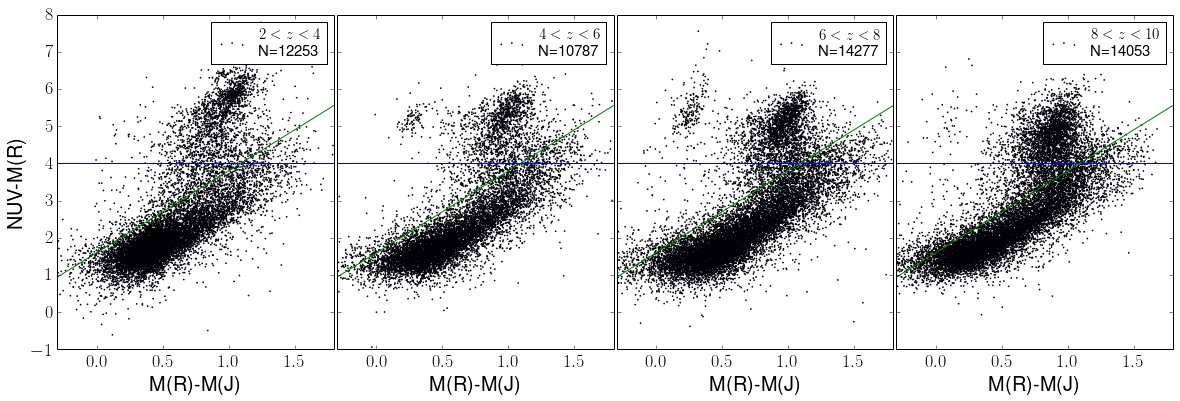

In [59]:
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18 

f=plt.figure(figsize=(20,6))
gs=gridspec.GridSpec(1,4)
gs.update(wspace=.01)

data_list=[data_2_4,data_4_6,data_6_8,data_8_1]
labellist=[2,4,6,8]

x=np.linspace(-1,2,10)
for i in range(0,4):
    ax=plt.subplot(gs[0,i])
    plt.scatter(data[data_list[i]]['MR']-data[data_list[i]]['MJ'],data[data_list[i]]['MNUV']-data[data_list[i]]['MR'],s=.5,label='$%s<z<%s$\nN=%s'%(labellist[i],labellist[i]+2,len(data[data_list[i]])))
    if i!=0:
        plt.tick_params(labelleft='off')
    plt.xlim(-.3,1.8)
    plt.ylim(-1,8)
    plt.xlabel('M(R)-M(J)',fontsize=20)
    if i==0:
        plt.ylabel('NUV-M(R)',fontsize=20)
    plt.legend(fontsize=15)
    plt.plot(x,4+0*x)
    plt.plot(x,1.6+2.2*x)



In [31]:
j=data_2_4

In [32]:
len(data[j])

12253